<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/PROJ_8_CV_PLANT_SEEDLING_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')  # Complete the code to read the dataset

In [ ]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


#EDA
PLOTTING RANDOM IMAGES FROM EACH CLASS

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

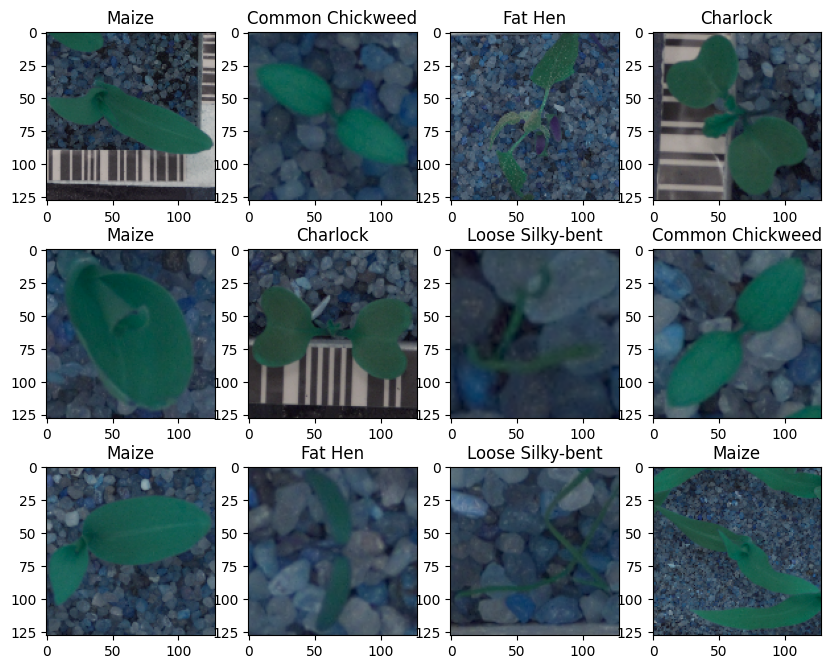

In [ ]:
plot_images(images,labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

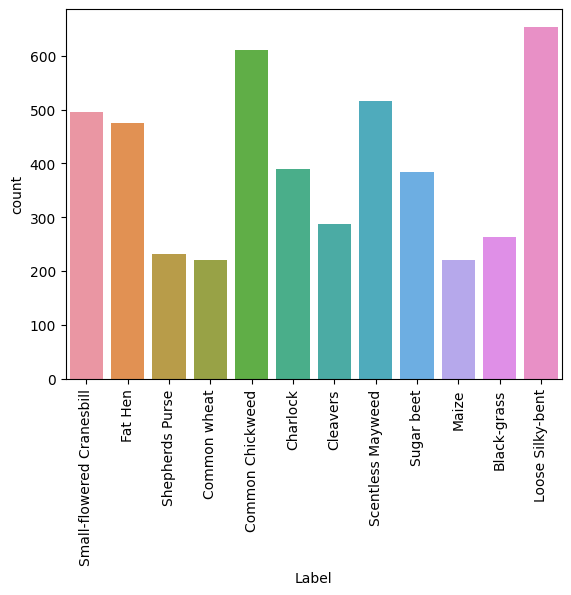

In [ ]:
sns.countplot(x=labels['Label'])            # Complete the code to check for data imbalance
plt.xticks(rotation='vertical')

#DATA PREPROCESSING
CONVERTING BGR TO RGB

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB

#RESIZING IMAGES

In [ ]:
images_decreased=[]
height = 64                    # Complete the code to define the height as 64
width =  64                    # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

#IMAGE BEFORE RESIZING

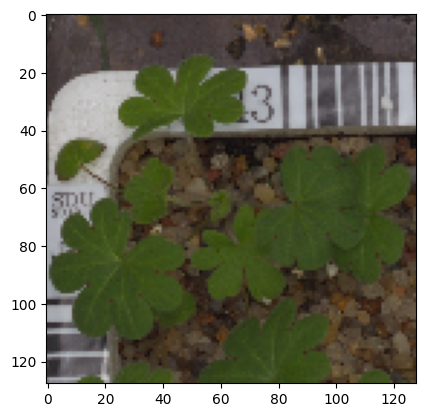

In [ ]:
plt.imshow(images[3])

#IMAGE AFTER RESIZING

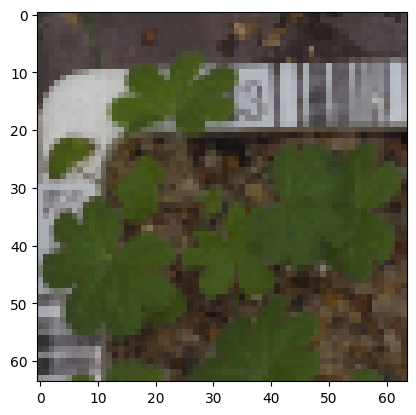

In [ ]:
plt.imshow(images_decreased[3])

#DATA PREP FOR MODELING

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)   # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


#ENCODE TARGET LABELS

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_val.shape,y_test.shape

((3847, 12), (428, 1), (475, 1))

#DATA NORMALIZATION

In [ ]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/225.0
X_test_normalized = X_test.astype('float32')/255.0

#MODEL BUILDING

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()                             # Complete the code to intialize a sequential model

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [ ]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2)

Epoch 1/30
121/121 - 14s - loss: 2.4158 - accuracy: 0.1396 - val_loss: 2.1475 - val_accuracy: 0.3037 - 14s/epoch - 119ms/step
Epoch 2/30
121/121 - 1s - loss: 2.1258 - accuracy: 0.2953 - val_loss: 1.8945 - val_accuracy: 0.3785 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.9357 - accuracy: 0.3408 - val_loss: 1.7228 - val_accuracy: 0.4182 - 1s/epoch - 11ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8246 - accuracy: 0.3712 - val_loss: 1.5965 - val_accuracy: 0.4626 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7123 - accuracy: 0.3951 - val_loss: 1.4992 - val_accuracy: 0.4907 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6377 - accuracy: 0.4094 - val_loss: 1.4638 - val_accuracy: 0.5164 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.5822 - accuracy: 0.4203 - val_loss: 1.3191 - val_accuracy: 0.5584 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5249 - accuracy: 0.4240 - val_loss: 1.2695 - val_accuracy: 0.5607 - 1s/epoch - 9ms/step
Epoch 9/30
121/121

MODEL EVALUATION

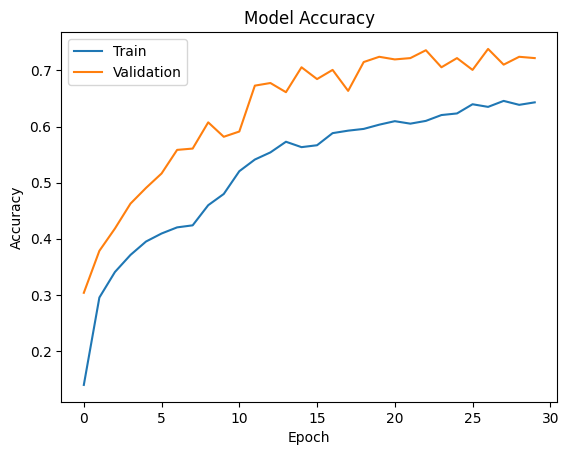

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

EVALUATE MODEL ON TEST

In [ ]:
accuracy = model1.evaluate(X_test_normalized,y_test_encoded, verbose=2)    # Complete the code to evaluate the model on test data

15/15 - 1s - loss: 0.8826 - accuracy: 0.7305 - 500ms/epoch - 33ms/step


PLOT CONFUSION MATRIX

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)                          # Complete the code to predict the output probabilities

15/15 [==============================] - 0s 3ms/step


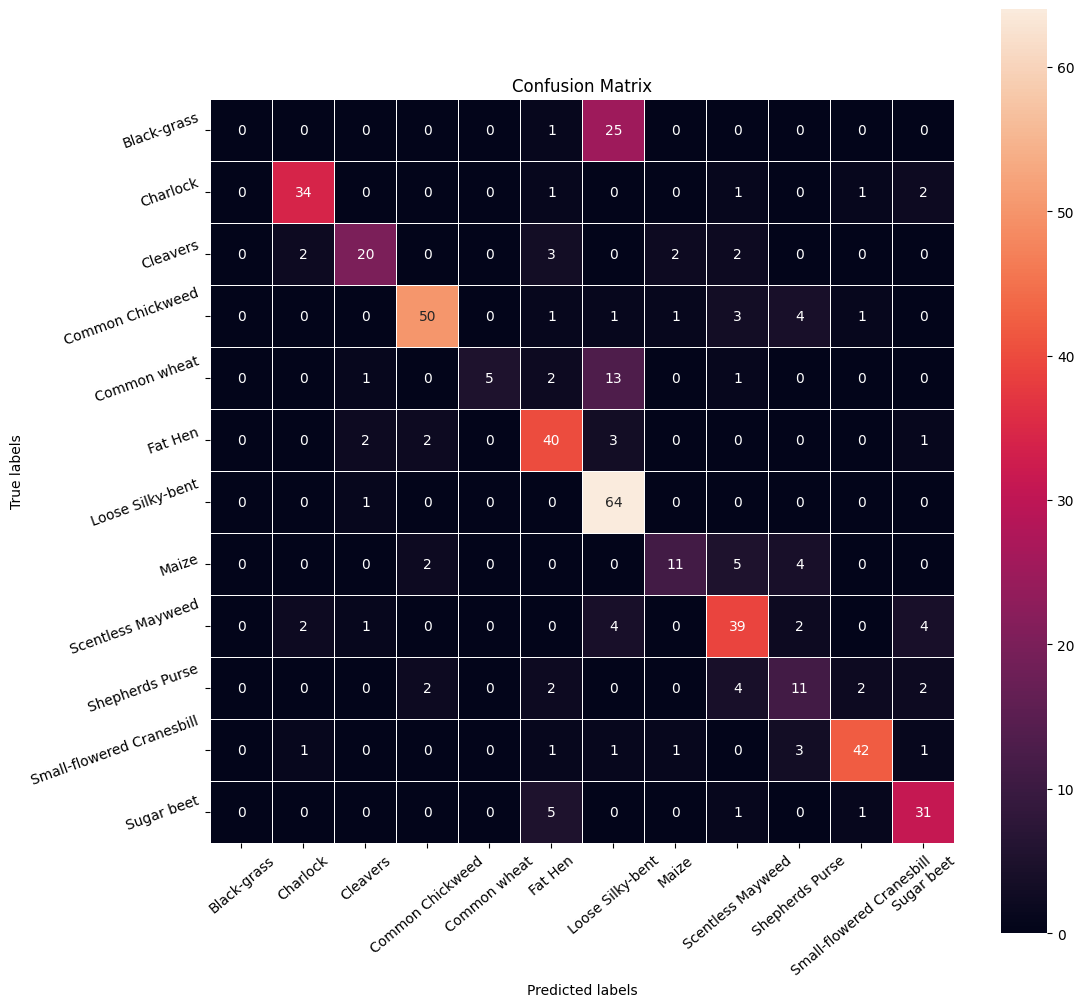

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

PLOTTING CLASSIFICATION REPORT

In [ ]:
# Plotting the classification report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.87      0.87      0.87        39
           2       0.80      0.69      0.74        29
           3       0.89      0.82      0.85        61
           4       1.00      0.23      0.37        22
           5       0.71      0.83      0.77        48
           6       0.58      0.98      0.73        65
           7       0.73      0.50      0.59        22
           8       0.70      0.75      0.72        52
           9       0.46      0.48      0.47        23
          10       0.89      0.84      0.87        50
          11       0.76      0.82      0.78        38

    accuracy                           0.73       475
   macro avg       0.70      0.65      0.65       475
weighted avg       0.72      0.73      0.70       475



#MODEL PERFORMANCE IMPROVEMENT

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

#DATA AUGMENTATION

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

FITTING MODEL ON TRAIN DATA

In [ ]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 9s 108ms/step - loss: 2.1258 - accuracy: 0.2559 - val_loss: 2.4104 - val_accuracy: 0.1332 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 76ms/step - loss: 1.6896 - accuracy: 0.3986 - val_loss: 2.2963 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 73ms/step - loss: 1.4992 - accuracy: 0.4684 - val_loss: 2.2372 - val_accuracy: 0.2266 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 105ms/step - loss: 1.3606 - accuracy: 0.5168 - val_loss: 2.0541 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 5s 75ms/step - loss: 1.2983 - accuracy: 0.5385 - val_loss: 1.7425 - val_accuracy: 0.5724 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 6s 101ms/step - loss: 1.2024 - accuracy: 0.5702 - val_loss: 2.3399 - val_accuracy: 0.2453 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 77ms/step - loss: 

MODEL EVALUATION

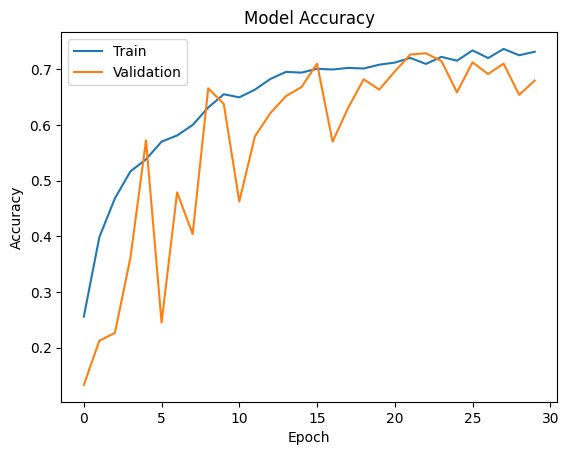

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

EVALUATE MODEL ON TEST

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

15/15 - 0s - loss: 0.7900 - accuracy: 0.7474 - 209ms/epoch - 14ms/step


PLOTTING CONFUSION MATRIX

In [ ]:
# Complete the code to obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


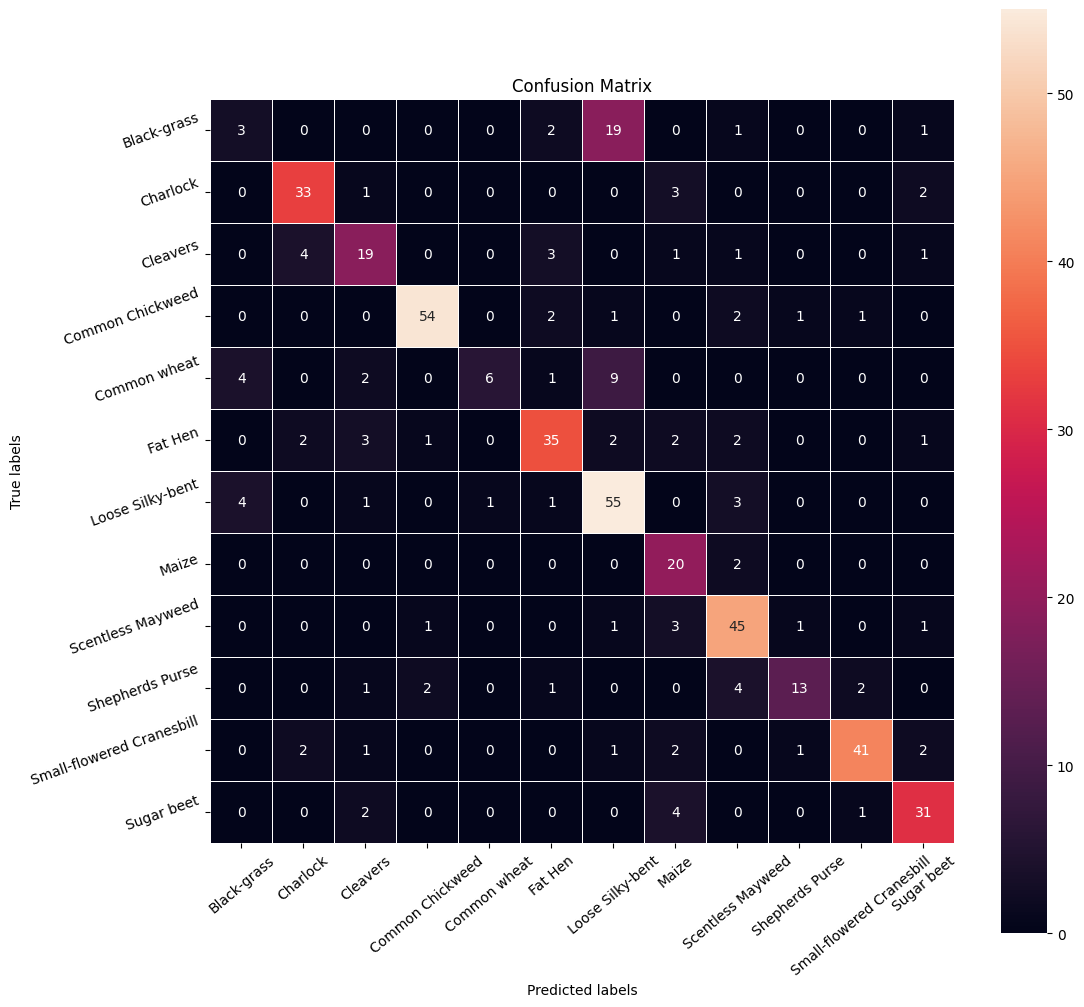

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#PLOTTING CLASSIFICATION REPORT

In [ ]:
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.12      0.16        26
           1       0.80      0.85      0.83        39
           2       0.63      0.66      0.64        29
           3       0.93      0.89      0.91        61
           4       0.86      0.27      0.41        22
           5       0.78      0.73      0.75        48
           6       0.62      0.85      0.72        65
           7       0.57      0.91      0.70        22
           8       0.75      0.87      0.80        52
           9       0.81      0.57      0.67        23
          10       0.91      0.82      0.86        50
          11       0.79      0.82      0.81        38

    accuracy                           0.75       475
   macro avg       0.73      0.69      0.69       475
weighted avg       0.75      0.75      0.73       475



#**FINAL MODEL**

#VISUALIZATION PREDICTION

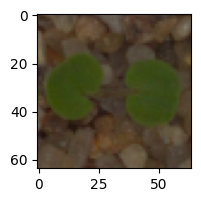

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


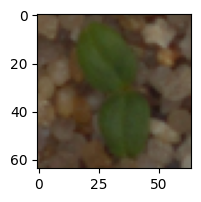

1/1 [==============================] - 0s 28ms/step
Predicted Label ['Cleavers']
True Label Cleavers


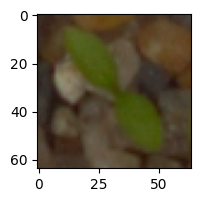

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


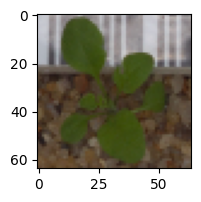

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

In [ ]:
pd.DataFrame({'Models':['MODEL 1','MODEL 2'],'Train Accuracy':['64%','73%'],'Validation Accuracy':['72%','68%'],'Test Accuracy':['73%','75%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,MODEL 1,64%,72%,73%
1,MODEL 2,73%,68%,75%
